In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Read the Stata dataset into Python
#Training
data_train = pd.read_stata(r'C:\Users\MALMANZAR\Dropbox (IFPRI)\monitoring-food-crises\data\TRAIN.dta',
convert_categoricals=False,
preserve_dtypes=True,
convert_missing=False)
print(data_train.shape)


(3891, 77)


In [3]:
#Test
data_test = pd.read_stata(r'C:\Users\MALMANZAR\Dropbox (IFPRI)\monitoring-food-crises\data\TEST.dta',
convert_categoricals=False,
preserve_dtypes=True,
convert_missing=False)
print(data_test.shape)

(1129, 77)


In [4]:
# Define the feature matrix (independent variables)
# and the target variable (dependent variable)
 
X_train=data_train.drop(columns=['crisis_cont', 'yL1_crisis_cont'])
y_train = data_train['crisis_cont']
yL1_train = data_train['yL1_crisis_cont']
X2_train=data_train.drop(columns=['crisis_cont'])

X_test=data_test.drop(columns=['crisis_cont', 'yL1_crisis_cont']) 
y_test = data_test['crisis_cont']
yL1_test= data_train['yL1_crisis_cont']

X2_test=data_test.drop(columns=['crisis_cont'])

In [5]:
feature_names = ['Latitude', 'Longitude', 'L1_Population (est.)', 'L2_Population (est.)', 'Population (est.)', 'L1_Battles (ct.)', 'L2_Battles (ct.)', 'Battles (ct.)', 'L1_Explosions (ct.)', 'L2_Explosions (ct.)', 'Explosions (ct.)', 'L1_Violence (ct.)', 'L2_Violence (ct.)', 'Violence (ct.)', 'L1_Fatalities (in Battles)', 'L2_Fatalities (in Battles)', 'Fatalities (in Battles)', 'L1_Fatalities (in Explosions)', 'L2_Fatalities (in Explosions)', 'Fatalities (in Explosions)', 'L1_Fatalities (in Violence)', 'L2_Fatalities (in Violence)', 'Fatalities (in Violence)', 'L1_GOSIF_GPP', 'L2_GOSIF_GPP', 'GOSIF_GPP', 'L1_Rainfall', 'L2_Rainfall', 'Rainfall', 'L1_GOSIF_GPP_sd', 'L2_GOSIF_GPP_sd', 'GOSIF_GPP_sd', 'L1_Temperature', 'L2_Temperature', 'Temperature', 'L1_Temperature_sd', 'L2_Temperature_sd', 'Temperature_sd', 'L1_Shortwave Radiation', 'L2_Shortwave Radiation', 'Shortwave Radiation', 'L1_Shortwave Radiation_sd', 'L2_Shortwave Radiation_sd', 'Shortwave Radiation_sd', 'L1_Precipitation_sd', 'L2_Precipitation_sd', 'Precipitation_sd', 'L1_Market Distance', 'L2_Market Distance', 'Market Distance', 'L1_Price Index', 'L2_Price Index', 'Price Index', 'Year1', 'Year2', 'Year3', 'Year4', 'Year5', 'Year6', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12']

In [6]:
feature_names2 = ['Latitude', 'Longitude', 'L1_Population (est.)', 'L2_Population (est.)', 'Population (est.)', 'L1_Battles (ct.)', 'L2_Battles (ct.)', 'Battles (ct.)', 'L1_Explosions (ct.)', 'L2_Explosions (ct.)', 'Explosions (ct.)', 'L1_Violence (ct.)', 'L2_Violence (ct.)', 'Violence (ct.)', 'L1_Fatalities (in Battles)', 'L2_Fatalities (in Battles)', 'Fatalities (in Battles)', 'L1_Fatalities (in Explosions)', 'L2_Fatalities (in Explosions)', 'Fatalities (in Explosions)', 'L1_Fatalities (in Violence)', 'L2_Fatalities (in Violence)', 'Fatalities (in Violence)', 'L1_GOSIF_GPP', 'L2_GOSIF_GPP', 'GOSIF_GPP', 'L1_Rainfall', 'L2_Rainfall', 'Rainfall', 'L1_GOSIF_GPP_sd', 'L2_GOSIF_GPP_sd', 'GOSIF_GPP_sd', 'L1_Temperature', 'L2_Temperature', 'Temperature', 'L1_Temperature_sd', 'L2_Temperature_sd', 'Temperature_sd', 'L1_Shortwave Radiation', 'L2_Shortwave Radiation', 'Shortwave Radiation', 'L1_Shortwave Radiation_sd', 'L2_Shortwave Radiation_sd', 'Shortwave Radiation_sd', 'L1_Precipitation_sd', 'L2_Precipitation_sd', 'Precipitation_sd', 'L1_Market Distance', 'L2_Market Distance', 'Market Distance', 'L1_Price Index', 'L2_Price Index', 'Price Index', 'Year1', 'Year2', 'Year3', 'Year4', 'Year5', 'Year6', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Month1', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12', 'L1_IPC Phase 3+ (%)']

In [7]:
print(feature_names2)

['Latitude', 'Longitude', 'L1_Population (est.)', 'L2_Population (est.)', 'Population (est.)', 'L1_Battles (ct.)', 'L2_Battles (ct.)', 'Battles (ct.)', 'L1_Explosions (ct.)', 'L2_Explosions (ct.)', 'Explosions (ct.)', 'L1_Violence (ct.)', 'L2_Violence (ct.)', 'Violence (ct.)', 'L1_Fatalities (in Battles)', 'L2_Fatalities (in Battles)', 'Fatalities (in Battles)', 'L1_Fatalities (in Explosions)', 'L2_Fatalities (in Explosions)', 'Fatalities (in Explosions)', 'L1_Fatalities (in Violence)', 'L2_Fatalities (in Violence)', 'Fatalities (in Violence)', 'L1_GOSIF_GPP', 'L2_GOSIF_GPP', 'GOSIF_GPP', 'L1_Rainfall', 'L2_Rainfall', 'Rainfall', 'L1_GOSIF_GPP_sd', 'L2_GOSIF_GPP_sd', 'GOSIF_GPP_sd', 'L1_Temperature', 'L2_Temperature', 'Temperature', 'L1_Temperature_sd', 'L2_Temperature_sd', 'Temperature_sd', 'L1_Shortwave Radiation', 'L2_Shortwave Radiation', 'Shortwave Radiation', 'L1_Shortwave Radiation_sd', 'L2_Shortwave Radiation_sd', 'Shortwave Radiation_sd', 'L1_Precipitation_sd', 'L2_Precipitati

In [8]:
print(feature_names)

['Latitude', 'Longitude', 'L1_Population (est.)', 'L2_Population (est.)', 'Population (est.)', 'L1_Battles (ct.)', 'L2_Battles (ct.)', 'Battles (ct.)', 'L1_Explosions (ct.)', 'L2_Explosions (ct.)', 'Explosions (ct.)', 'L1_Violence (ct.)', 'L2_Violence (ct.)', 'Violence (ct.)', 'L1_Fatalities (in Battles)', 'L2_Fatalities (in Battles)', 'Fatalities (in Battles)', 'L1_Fatalities (in Explosions)', 'L2_Fatalities (in Explosions)', 'Fatalities (in Explosions)', 'L1_Fatalities (in Violence)', 'L2_Fatalities (in Violence)', 'Fatalities (in Violence)', 'L1_GOSIF_GPP', 'L2_GOSIF_GPP', 'GOSIF_GPP', 'L1_Rainfall', 'L2_Rainfall', 'Rainfall', 'L1_GOSIF_GPP_sd', 'L2_GOSIF_GPP_sd', 'GOSIF_GPP_sd', 'L1_Temperature', 'L2_Temperature', 'Temperature', 'L1_Temperature_sd', 'L2_Temperature_sd', 'Temperature_sd', 'L1_Shortwave Radiation', 'L2_Shortwave Radiation', 'Shortwave Radiation', 'L1_Shortwave Radiation_sd', 'L2_Shortwave Radiation_sd', 'Shortwave Radiation_sd', 'L1_Precipitation_sd', 'L2_Precipitati

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# impute X 

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)

# impute X_test 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_test)
X_test = imp.transform(X_test)



In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X2_train)
X2_train = imp.transform(X2_train)

# impute X_test 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X2_test)
X2_test = imp.transform(X2_test)

In [11]:
olsmodel		 = LinearRegression() 
olsmodel.fit(X_train, y_train)
 
pred_ols = olsmodel.predict(X_test)
mse = mean_squared_error(y_test, pred_ols)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_ols)
r2 = r2_score(y_test, pred_ols)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.030345959231620152
Root Mean Squared Error: 0.17420091627663775
Mean Absolute Error: 0.14391478073031344
R-squared: 0.11593247854776756


In [12]:
print( mse)
print( rmse)
print( mae)
print( r2)

0.030345959231620152
0.17420091627663775
0.14391478073031344
0.11593247854776756


In [13]:
olsmodel2		 = LinearRegression() 
olsmodel2.fit(X2_train, y_train)
 
pred_ols = olsmodel2.predict(X2_test)
mse = mean_squared_error(y_test, pred_ols)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_ols)
r2 = r2_score(y_test, pred_ols)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.027898998469353765
Root Mean Squared Error: 0.16702993285442513
Mean Absolute Error: 0.13554568716038437
R-squared: 0.18721968089573615


In [14]:
print( mse)
print( rmse)
print( mae)
print( r2)

0.027898998469353765
0.16702993285442513
0.13554568716038437
0.18721968089573615


In [15]:
# Fit the model 

rfmodel		 = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42) 
rfmodel.fit(X_train, y_train)
 
pred_rf = rfmodel.predict(X_test)
mse = mean_squared_error(y_test, pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_rf)
r2 = r2_score(y_test, pred_rf)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.020156835110359032
Root Mean Squared Error: 0.14197476927383623
Mean Absolute Error: 0.11311957591830746
R-squared: 0.41277179210838066


In [16]:
print( mse)
print( rmse)
print( mae)
print( r2)

0.020156835110359032
0.14197476927383623
0.11311957591830746
0.41277179210838066


In [17]:
rfmodel2		 = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rfmodel2.fit(X2_train, y_train)
 
pred_rf = rfmodel2.predict(X2_test)
mse = mean_squared_error(y_test, pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_rf)
r2 = r2_score(y_test, pred_rf)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.02315066506463127
Root Mean Squared Error: 0.1521534260693175
Mean Absolute Error: 0.11871750936554291
R-squared: 0.32555267317655834


In [18]:
print( mse)
print( rmse)
print( mae)
print( r2)

0.02315066506463127
0.1521534260693175
0.11871750936554291
0.32555267317655834


In [19]:
boostmodel 	= XGBRegressor(n_estimators=500, max_depth=10,  learning_rate=0.01)
boostmodel.fit(X_train, y_train)

pred_boost = boostmodel.predict(X_test)
mse = mean_squared_error(y_test, pred_boost)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_boost)
r2 = r2_score(y_test, pred_boost)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.019417
Root Mean Squared Error: 0.13934489
Mean Absolute Error: 0.10845235
R-squared: 0.4343253740533596


In [20]:
print( mse)
print( rmse)
print( mae)
print( r2)

0.019417
0.13934489
0.10845235
0.4343253740533596


In [21]:
boostmodel2 	= XGBRegressor(n_estimators=500,  max_depth=10, learning_rate=0.01)
boostmodel2.fit(X2_train, y_train)

pred_boost = boostmodel2.predict(X2_test)
mse = mean_squared_error(y_test, pred_boost)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_boost)
r2 = r2_score(y_test, pred_boost)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.021744242
Root Mean Squared Error: 0.14745928
Mean Absolute Error: 0.112694345
R-squared: 0.36652596655295466


In [22]:
print( mse)
print( rmse)
print( mae)
print( r2)

0.021744242
0.14745928
0.112694345
0.36652596655295466


In [23]:
# Obtain feature importances from the Random Forest model
olsimportances = olsmodel.coef_
rfimportances = rfmodel.feature_importances_
boostimportances = boostmodel.feature_importances_

In [24]:
olsimportances2 = olsmodel2.coef_
rfimportances2 = rfmodel2.feature_importances_
boostimportances2 = boostmodel2.feature_importances_

In [25]:
for feature, importance in zip(feature_names, olsimportances):
    print(f"{feature}: {importance}")

Latitude: 0.04111990229017272
Longitude: 0.027589589192364407
L1_Population (est.): -0.02740600760931479
L2_Population (est.): 0.0028813264614589284
Population (est.): -0.00897471992903267
L1_Battles (ct.): -0.0157070643685781
L2_Battles (ct.): 0.015008699246448872
Battles (ct.): 0.007105907561844559
L1_Explosions (ct.): 0.00013051946733555822
L2_Explosions (ct.): 0.0003836289889219899
Explosions (ct.): 0.0035545644515060917
L1_Violence (ct.): -0.005432457025232788
L2_Violence (ct.): 0.0027850915436452746
Violence (ct.): -0.012198753341627372
L1_Fatalities (in Battles): 0.006421941202559061
L2_Fatalities (in Battles): -0.008790119013686086
Fatalities (in Battles): 0.002690984775885463
L1_Fatalities (in Explosions): -0.005473185094090275
L2_Fatalities (in Explosions): -0.013448686316968205
Fatalities (in Explosions): -0.005635902590615879
L1_Fatalities (in Violence): 0.007365035868777575
L2_Fatalities (in Violence): 0.0007153974944265869
Fatalities (in Violence): 0.005091204749334047
L1

In [38]:
for feature  in  feature_names :
    print(feature)

Latitude
Longitude
L1_Population (est.)
L2_Population (est.)
Population (est.)
L1_Battles (ct.)
L2_Battles (ct.)
Battles (ct.)
L1_Explosions (ct.)
L2_Explosions (ct.)
Explosions (ct.)
L1_Violence (ct.)
L2_Violence (ct.)
Violence (ct.)
L1_Fatalities (in Battles)
L2_Fatalities (in Battles)
Fatalities (in Battles)
L1_Fatalities (in Explosions)
L2_Fatalities (in Explosions)
Fatalities (in Explosions)
L1_Fatalities (in Violence)
L2_Fatalities (in Violence)
Fatalities (in Violence)
L1_GOSIF_GPP
L2_GOSIF_GPP
GOSIF_GPP
L1_Rainfall
L2_Rainfall
Rainfall
L1_GOSIF_GPP_sd
L2_GOSIF_GPP_sd
GOSIF_GPP_sd
L1_Temperature
L2_Temperature
Temperature
L1_Temperature_sd
L2_Temperature_sd
Temperature_sd
L1_Shortwave Radiation
L2_Shortwave Radiation
Shortwave Radiation
L1_Shortwave Radiation_sd
L2_Shortwave Radiation_sd
Shortwave Radiation_sd
L1_Precipitation_sd
L2_Precipitation_sd
Precipitation_sd
L1_Market Distance
L2_Market Distance
Market Distance
L1_Price Index
L2_Price Index
Price Index
Year1
Year2
Year3


In [39]:
for  importance in  olsimportances :
    print(importance)

0.04111990229017272
0.027589589192364407
-0.02740600760931479
0.0028813264614589284
-0.00897471992903267
-0.0157070643685781
0.015008699246448872
0.007105907561844559
0.00013051946733555822
0.0003836289889219899
0.0035545644515060917
-0.005432457025232788
0.0027850915436452746
-0.012198753341627372
0.006421941202559061
-0.008790119013686086
0.002690984775885463
-0.005473185094090275
-0.013448686316968205
-0.005635902590615879
0.007365035868777575
0.0007153974944265869
0.005091204749334047
-0.0347383336378826
0.044432699448932085
0.059662846424715595
0.016928922685665797
-0.01212273302403753
-0.02196242356254548
-0.0022986336637493936
0.02117930746129329
-0.011008496820642194
-0.01034308847351018
0.018550695056291033
0.02039191800975072
0.024887760833267103
0.020370692521750555
0.03293233949260979
0.0005604233958210339
-0.0023201594207711528
-0.008880865294000565
-0.001924468237254015
-0.02189576695798548
-0.00652630661875795
0.008739181006995608
-0.002949071441251695
-0.010380089461182

In [26]:
for feature, importance in zip(feature_names2, olsimportances2):
    print(f"{feature}: {importance}")

Latitude: 0.02804838215705058
Longitude: 0.01806554634275019
L1_Population (est.): -0.021530293641338613
L2_Population (est.): 0.003775560871640869
Population (est.): -0.008684086984268029
L1_Battles (ct.): -0.013804930457677654
L2_Battles (ct.): 0.012981766128991781
Battles (ct.): 0.010549470337815038
L1_Explosions (ct.): -0.0018708390073640911
L2_Explosions (ct.): -0.0012908055580531722
Explosions (ct.): 0.003891502465750816
L1_Violence (ct.): -0.006641673958726927
L2_Violence (ct.): 0.0030207232732551697
Violence (ct.): -0.01051531469600435
L1_Fatalities (in Battles): 0.008462573519428408
L2_Fatalities (in Battles): -0.011152265254204824
Fatalities (in Battles): 4.269707570290484e-05
L1_Fatalities (in Explosions): -0.00452069420892837
L2_Fatalities (in Explosions): -0.01032348516770509
Fatalities (in Explosions): -0.004497248586340912
L1_Fatalities (in Violence): 0.00701607075532064
L2_Fatalities (in Violence): -0.002027802177995851
Fatalities (in Violence): 0.0053491537709730004
L1

In [40]:
for  importance in  olsimportances2 :
    print(importance)

0.02804838215705058
0.01806554634275019
-0.021530293641338613
0.003775560871640869
-0.008684086984268029
-0.013804930457677654
0.012981766128991781
0.010549470337815038
-0.0018708390073640911
-0.0012908055580531722
0.003891502465750816
-0.006641673958726927
0.0030207232732551697
-0.01051531469600435
0.008462573519428408
-0.011152265254204824
4.269707570290484e-05
-0.00452069420892837
-0.01032348516770509
-0.004497248586340912
0.00701607075532064
-0.002027802177995851
0.0053491537709730004
-0.034021691060326605
0.04136481445436048
0.041875355157263185
0.014650893941624214
-0.012228036967219708
-0.01697146739790242
-0.007312254242011583
0.01830881126812066
-0.005327940957499069
-0.014245556795607229
0.018884069270185815
0.01937792987549027
0.021227753273508718
0.01533404668724728
0.023386998451389376
0.0023388678234374984
-0.0017145792094488063
-0.011120610685211946
-0.001622847368505417
-0.012934650627697046
-0.009095157796403535
0.005040390027370601
-0.002834659513303326
-0.01091059843

In [27]:
# Print the feature importances
for feature, importance in zip(feature_names, rfimportances):
    print(f"{feature}: {importance}")

Latitude: 0.05999948768137752
Longitude: 0.06696533641165067
L1_Population (est.): 0.060330612096209504
L2_Population (est.): 0.022955801142442462
Population (est.): 0.08661463430815068
L1_Battles (ct.): 0.0029287150083958167
L2_Battles (ct.): 0.0024849921526500316
Battles (ct.): 0.0033248925920140527
L1_Explosions (ct.): 0.0006462644999500124
L2_Explosions (ct.): 0.0009014671220758927
Explosions (ct.): 0.000885444209862672
L1_Violence (ct.): 0.0017676601276373938
L2_Violence (ct.): 0.0022973845979147142
Violence (ct.): 0.0030846988063976772
L1_Fatalities (in Battles): 0.0021463524768572783
L2_Fatalities (in Battles): 0.0031096044345724607
Fatalities (in Battles): 0.00343396924618654
L1_Fatalities (in Explosions): 0.0008288536504471602
L2_Fatalities (in Explosions): 0.0006707191062216552
Fatalities (in Explosions): 0.0008678974734636339
L1_Fatalities (in Violence): 0.0022547415854312592
L2_Fatalities (in Violence): 0.0029758052562548288
Fatalities (in Violence): 0.002538686412600072
L1

In [41]:
for  importance in  rfimportances :
    print(importance)

0.05999948768137752
0.06696533641165067
0.060330612096209504
0.022955801142442462
0.08661463430815068
0.0029287150083958167
0.0024849921526500316
0.0033248925920140527
0.0006462644999500124
0.0009014671220758927
0.000885444209862672
0.0017676601276373938
0.0022973845979147142
0.0030846988063976772
0.0021463524768572783
0.0031096044345724607
0.00343396924618654
0.0008288536504471602
0.0006707191062216552
0.0008678974734636339
0.0022547415854312592
0.0029758052562548288
0.002538686412600072
0.009632563794725019
0.01667439116062545
0.028316041244777285
0.009780144925732278
0.007970237932601834
0.01686561994266798
0.007365623071045862
0.006136195349146922
0.017411847803590456
0.011311547041896736
0.011903375770559653
0.03690780780026135
0.08087648767685243
0.008256601985783872
0.10542917908287985
0.008304166384928549
0.0060762925962287865
0.0125430319961204
0.00808997285036899
0.009840122673583945
0.013964488581453204
0.00863693808313988
0.006080610524739682
0.011001279124147554
0.02140774

In [28]:
# Print the feature importances
for feature, importance in zip(feature_names2, rfimportances2):
    print(f"{feature}: {importance}")

Latitude: 0.042083719193214575
Longitude: 0.03310874406725156
L1_Population (est.): 0.04867469465721527
L2_Population (est.): 0.015326094956890026
Population (est.): 0.08416657903127188
L1_Battles (ct.): 0.0022124351135222975
L2_Battles (ct.): 0.0018660116005253728
Battles (ct.): 0.0030152540810614516
L1_Explosions (ct.): 0.0007596578418327568
L2_Explosions (ct.): 0.0008479490488128224
Explosions (ct.): 0.0007635245999807485
L1_Violence (ct.): 0.0022607209985397846
L2_Violence (ct.): 0.0018371034792923778
Violence (ct.): 0.002548546589709043
L1_Fatalities (in Battles): 0.0018391329063615499
L2_Fatalities (in Battles): 0.00295262397741903
Fatalities (in Battles): 0.002388194679408834
L1_Fatalities (in Explosions): 0.000705056156634075
L2_Fatalities (in Explosions): 0.000671104149921303
Fatalities (in Explosions): 0.000676147808424031
L1_Fatalities (in Violence): 0.0021204905281646783
L2_Fatalities (in Violence): 0.003113191792146393
Fatalities (in Violence): 0.002445683390121685
L1_GOSI

In [42]:
for  importance in  rfimportances2 :
    print(importance)

0.042083719193214575
0.03310874406725156
0.04867469465721527
0.015326094956890026
0.08416657903127188
0.0022124351135222975
0.0018660116005253728
0.0030152540810614516
0.0007596578418327568
0.0008479490488128224
0.0007635245999807485
0.0022607209985397846
0.0018371034792923778
0.002548546589709043
0.0018391329063615499
0.00295262397741903
0.002388194679408834
0.000705056156634075
0.000671104149921303
0.000676147808424031
0.0021204905281646783
0.003113191792146393
0.002445683390121685
0.013477661381390324
0.014845748051851777
0.0176708233333729
0.007841683236015822
0.008866620172600365
0.014427776457393144
0.007690401550893929
0.009409584353877778
0.01030802352620505
0.013178552314087452
0.009772799000003695
0.021524136331998935
0.05995568968467632
0.010627245101584082
0.056766073983587226
0.0067072844103679375
0.006571403204364142
0.010287461833450761
0.009462318776343858
0.006557261992852774
0.012524215503588869
0.007156194570398796
0.006621856628537746
0.01026186086960759
0.011960044

In [29]:
for feature, importance in zip(feature_names, boostimportances):
    print(f"{feature}: {importance}")

Latitude: 0.00714695081114769
Longitude: 0.015593945980072021
L1_Population (est.): 0.013529559597373009
L2_Population (est.): 0.009962821379303932
Population (est.): 0.013744215480983257
L1_Battles (ct.): 0.0038763831835240126
L2_Battles (ct.): 0.0022246462758630514
Battles (ct.): 0.004331562668085098
L1_Explosions (ct.): 0.0023222118616104126
L2_Explosions (ct.): 0.001073271851055324
Explosions (ct.): 0.006812615320086479
L1_Violence (ct.): 0.002866588067263365
L2_Violence (ct.): 0.004062621854245663
Violence (ct.): 0.007859294302761555
L1_Fatalities (in Battles): 0.003618980059400201
L2_Fatalities (in Battles): 0.004965015221387148
Fatalities (in Battles): 0.005072353407740593
L1_Fatalities (in Explosions): 0.002478096866980195
L2_Fatalities (in Explosions): 0.0027237001340836287
Fatalities (in Explosions): 0.003941639792174101
L1_Fatalities (in Violence): 0.0040258499793708324
L2_Fatalities (in Violence): 0.004591643810272217
Fatalities (in Violence): 0.004529726225882769
L1_GOSIF_

In [43]:
for  importance in  boostimportances :
    print(importance)

0.007146951
0.015593946
0.01352956
0.009962821
0.0137442155
0.0038763832
0.0022246463
0.0043315627
0.0023222119
0.0010732719
0.0068126153
0.002866588
0.004062622
0.007859294
0.00361898
0.004965015
0.0050723534
0.0024780969
0.0027237001
0.00394164
0.00402585
0.004591644
0.004529726
0.0056929844
0.010765703
0.011601713
0.006476016
0.0046369014
0.009942766
0.0054676337
0.004490631
0.010115353
0.014082085
0.005096102
0.01816309
0.029649802
0.007083214
0.037143357
0.006253403
0.00525745
0.007965777
0.006292884
0.0052420367
0.010259024
0.00614304
0.005214233
0.0054065916
0.020941924
0.010910977
0.018505093
0.014515806
0.009485404
0.022540048
0.024426859
0.023519129
0.012052562
0.010473772
0.051320117
0.029160615
0.02232784
0.008666994
0.0035966064
0.034012455
0.0064337426
0.00385714
0.0316879
0.020367835
0.059668474
0.029381782
0.010750719
0.043119453
0.0068911025
0.0115825
0.0068580117
0.08314969


In [30]:
for feature, importance in zip(feature_names2, boostimportances2):
    print(f"{feature}: {importance}")

Latitude: 0.006393143907189369
Longitude: 0.008757795207202435
L1_Population (est.): 0.012881332077085972
L2_Population (est.): 0.005241740960627794
Population (est.): 0.015023928135633469
L1_Battles (ct.): 0.002752789296209812
L2_Battles (ct.): 0.0027258149348199368
Battles (ct.): 0.0031320236157625914
L1_Explosions (ct.): 0.0020211783703416586
L2_Explosions (ct.): 0.00192361103836447
Explosions (ct.): 0.002034316072240472
L1_Violence (ct.): 0.0028778070118278265
L2_Violence (ct.): 0.002609073417261243
Violence (ct.): 0.007932997308671474
L1_Fatalities (in Battles): 0.004322738852351904
L2_Fatalities (in Battles): 0.006995604373514652
Fatalities (in Battles): 0.0034128190018236637
L1_Fatalities (in Explosions): 0.004001853987574577
L2_Fatalities (in Explosions): 0.0017637995770201087
Fatalities (in Explosions): 0.0022121837828308344
L1_Fatalities (in Violence): 0.006125329528003931
L2_Fatalities (in Violence): 0.007691764738410711
Fatalities (in Violence): 0.0069226850755512714
L1_GOS

In [44]:
for  importance in  boostimportances2 :
    print(importance)

0.006393144
0.008757795
0.012881332
0.005241741
0.015023928
0.0027527893
0.002725815
0.0031320236
0.0020211784
0.001923611
0.002034316
0.002877807
0.0026090734
0.007932997
0.004322739
0.0069956044
0.003412819
0.004001854
0.0017637996
0.0022121838
0.0061253295
0.0076917647
0.006922685
0.010011811
0.010547341
0.010228227
0.006199383
0.007891388
0.0091166645
0.0075235413
0.0071557057
0.009976756
0.008158034
0.010551802
0.013000772
0.020977467
0.008774095
0.022399193
0.0044258498
0.005742584
0.008653639
0.0059450455
0.007436791
0.008643539
0.006130087
0.009409164
0.00774351
0.015405366
0.009592165
0.016035112
0.01223713
0.015402278
0.03840044
0.029964702
0.057474393
0.010411074
0.018376675
0.033081133
0.0038436945
0.009284126
0.02528457
0.008175567
0.022498522
0.012788127
0.010211835
0.0069874306
0.02699638
0.016565422
0.012658019
0.013990105
0.0376046
0.011220162
0.015546162
0.017792469
0.04941447
0.09635913


In [31]:

# load JS visualization code to notebook
shap.initjs()
# Calculate shapeley values and importance
#correlation_dependent

explainer_ols = shap.LinearExplainer(olsmodel, X_train, feature_dependence="correlation_dependent")
shap_values_ols = explainer_ols.shap_values(X_test)
    
explainer_rf = shap.TreeExplainer(rfmodel)
shap_values_rf = explainer_rf.shap_values(X_test)

explainer_boost = shap.TreeExplainer(boostmodel)
shap_values_boost = explainer_boost.shap_values(X_test)

explainer_ols2 = shap.LinearExplainer(olsmodel2, X2_train, feature_dependence="correlation_dependent")
shap_values_ols2 = explainer_ols2.shap_values(X2_test)
    
explainer_rf2 = shap.TreeExplainer(rfmodel2)
shap_values_rf2 = explainer_rf2.shap_values(X2_test)

explainer_boost2 = shap.TreeExplainer(boostmodel2)
shap_values_boost2 = explainer_boost2.shap_values(X2_test)


Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

array([-5.88033775e+05,  4.94655471e+04, -3.53066180e+05, -1.82000462e+05,
        4.21990795e+04, -6.50966767e+03,  2.95074430e+04, -1.97289895e+04,
        4.61671227e+03,  1.49936174e+03, -5.84076869e+03, -5.02003946e+04,
        9.43240117e+03,  7.03705215e+03,  2.64041259e+03, -7.24344087e+03,
       -1.37064277e+04, -3.25264756e+03,  8.31326729e+03,  9.75515324e+03,
        2.08120872e+03,  3.76567692e+03,  1.80810065e+04,  9.25837093e+03,
       -4.50811504e+04,  2.40251017e+05,  8.50486474e+03, -4.14797407e+04,
        7.41476401e+04, -1.02398046e+04, -1.26107016e+04,  8.03247633e+04,
       -8.24874535e+04,  6.84567392e+03, -8.27596646e+04,  8.98195853e+04,
        5.72033448e+03,  9.81077043e+03, -1.57536175e+05,  1.43651590e+05,
        3.56175356e+04,  7.53429328e+04, -9.10368491e+04, -9.10823866e+04,
        2.34940092e+03, -1.28083770e+04,  4.61339736e+04,  2.91610790e+05,
       -2.10301786e+04, -2.42328504e+05, -6.45204184e+03,  1.39742072e+04,
        5.05223629e+04, -

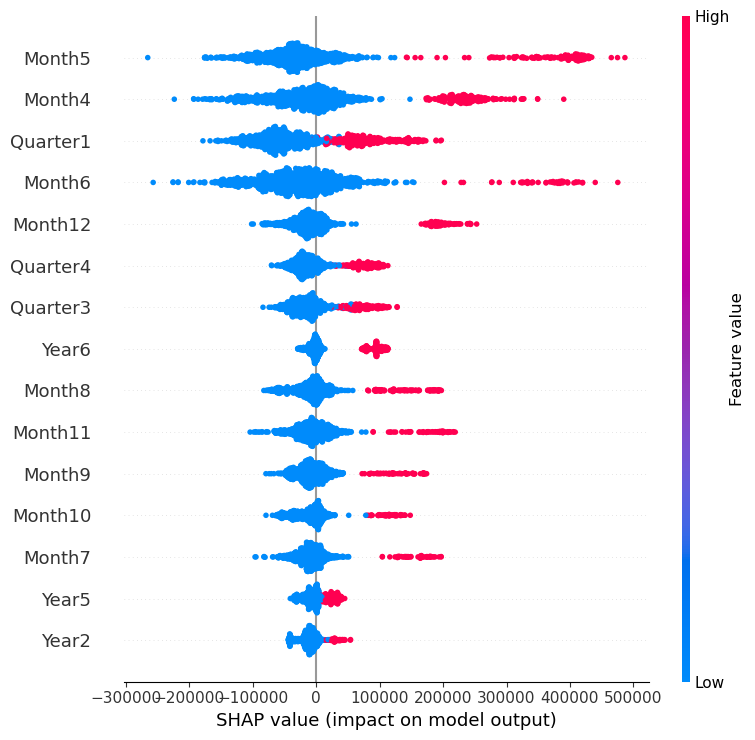

In [49]:
shap.summary_plot(shap_values_ols, X_test, feature_names=feature_names, max_display=15)

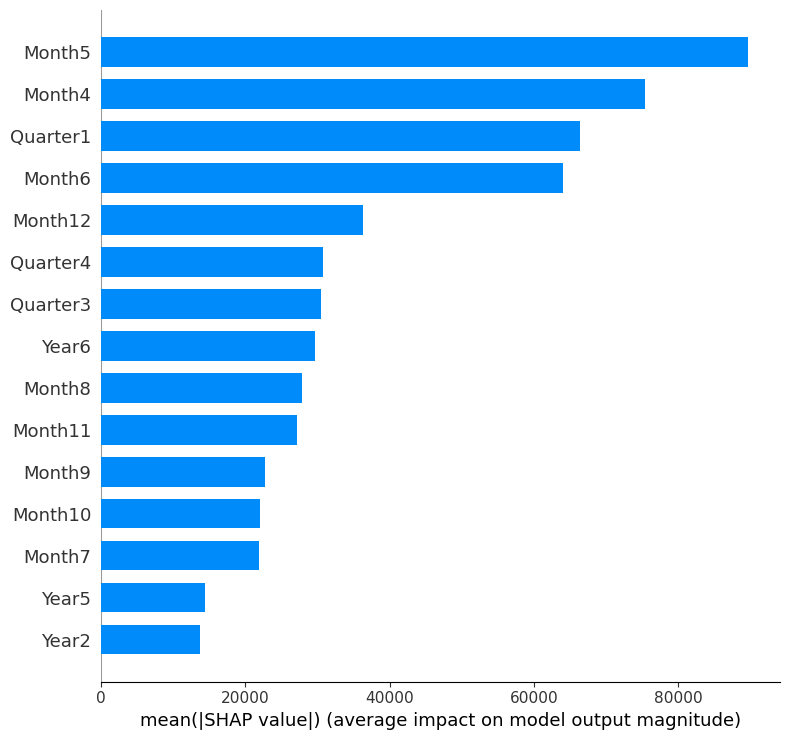

In [50]:

shap.summary_plot(shap_values_ols, X_test, feature_names=feature_names, max_display=15, plot_type='bar')

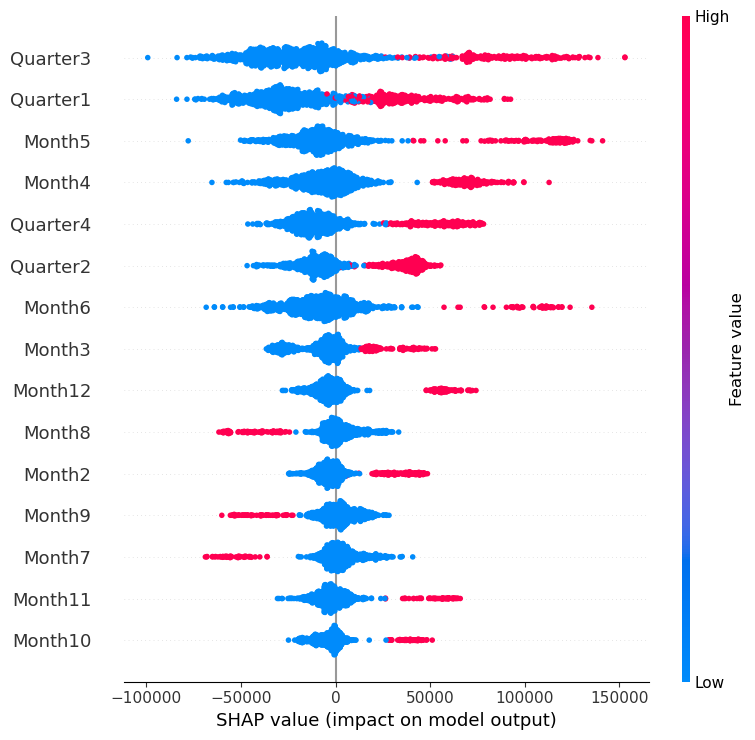

In [51]:
shap.summary_plot(shap_values_ols2, X2_test, feature_names=feature_names2, max_display=15)

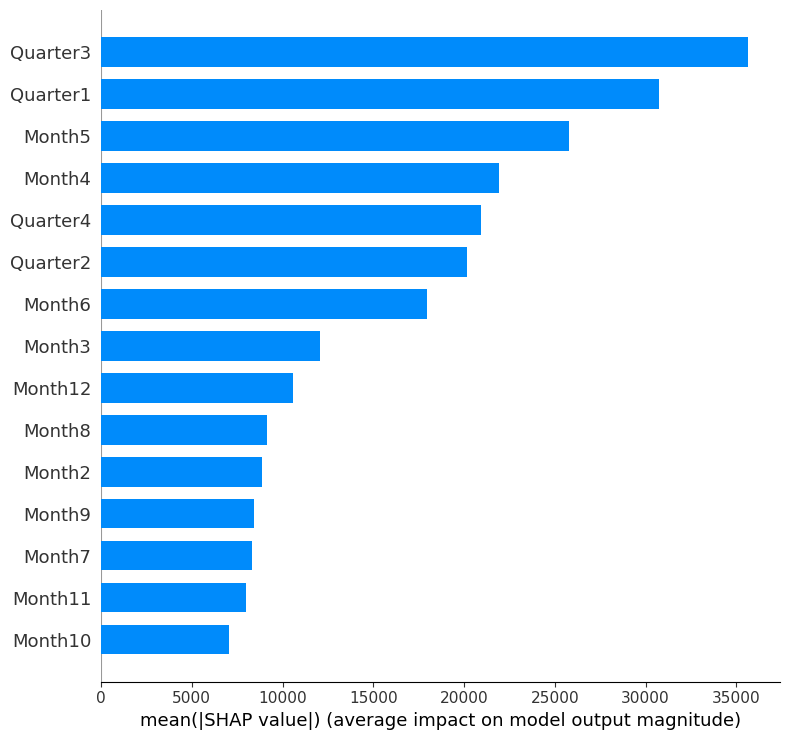

In [52]:

shap.summary_plot(shap_values_ols2, X2_test, feature_names=feature_names2, max_display=15, plot_type='bar')

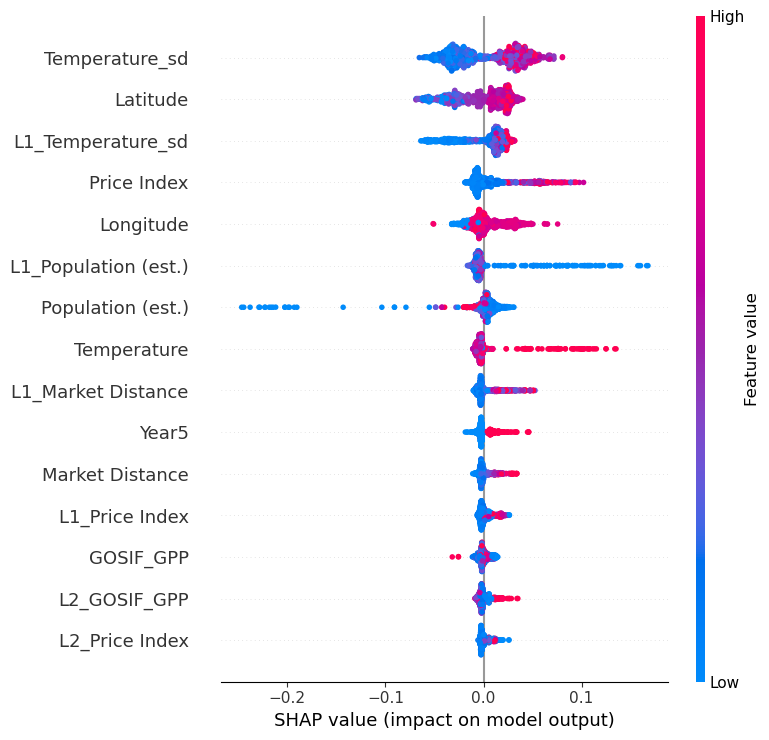

In [53]:
shap.summary_plot(shap_values_rf, features=X_test, feature_names=feature_names, max_display=15)

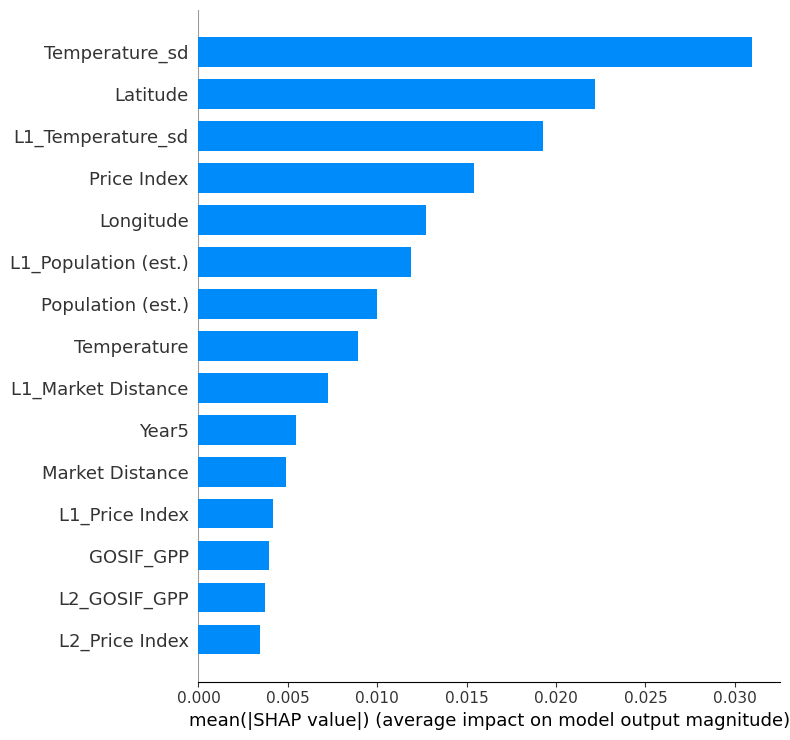

In [54]:

S=shap.summary_plot(shap_values_rf, features=X_test, feature_names=feature_names, max_display=15, plot_type='bar')

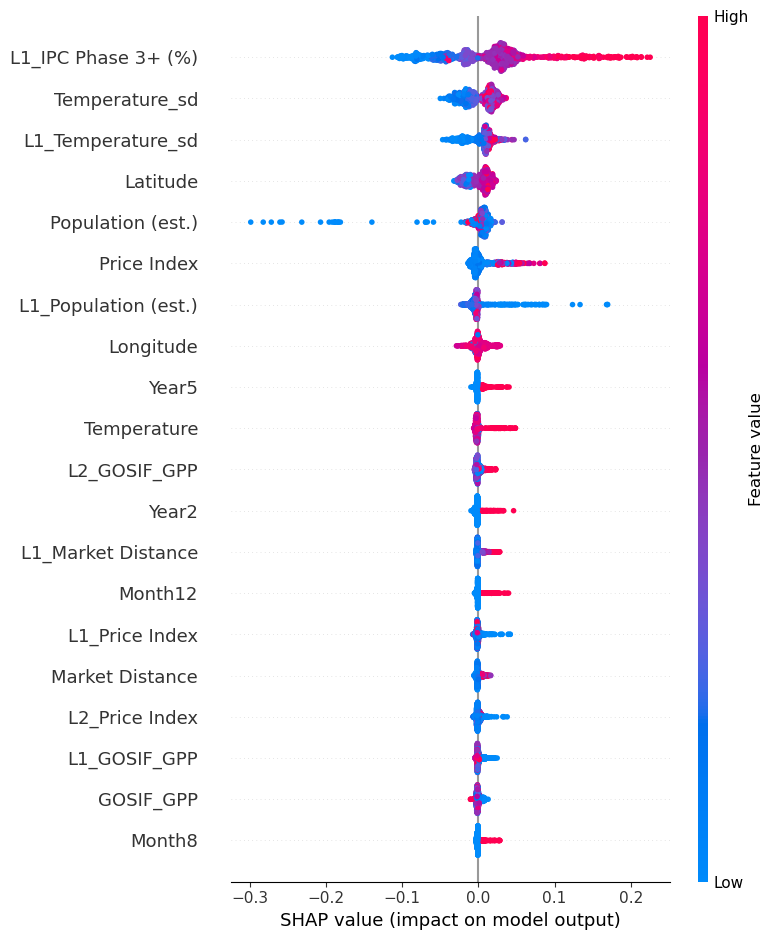

In [55]:
shap.summary_plot(shap_values_rf2, features=X2_test, feature_names=feature_names2)

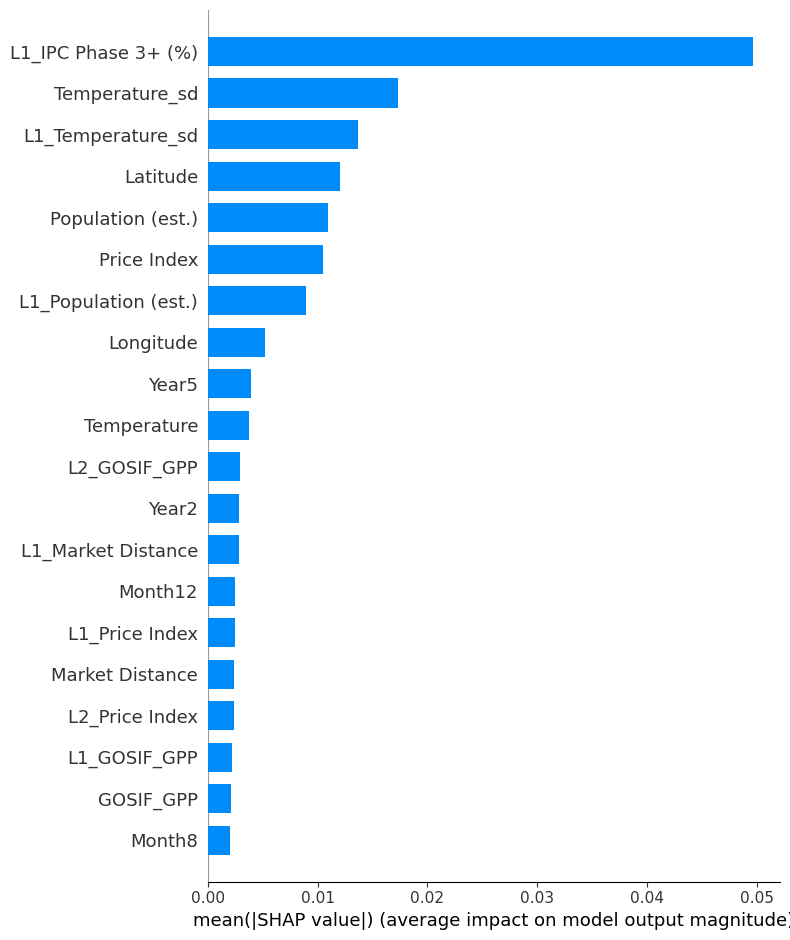

In [56]:

shap.summary_plot(shap_values_rf2, features=X2_test, feature_names=feature_names2, plot_type='bar')

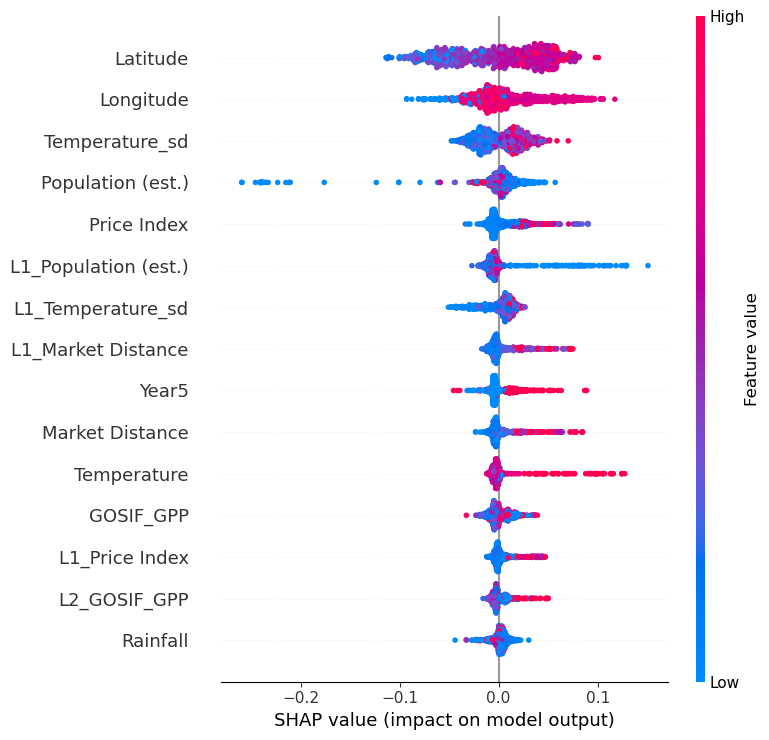

In [58]:
shap.summary_plot(shap_values_boost, features=X_test, feature_names=feature_names, max_display=15)

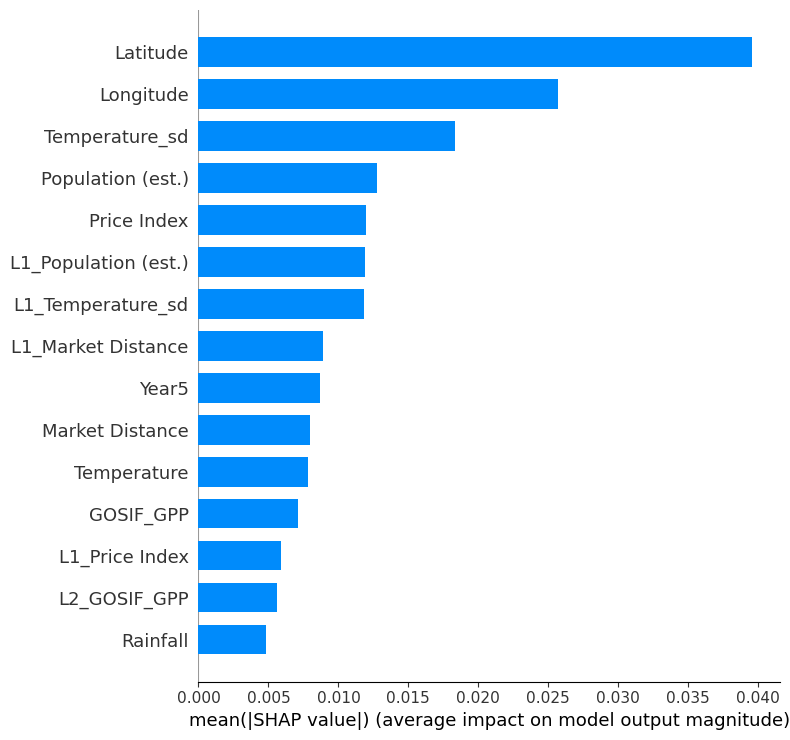

In [59]:

shap.summary_plot(shap_values_boost, features=X_test, feature_names=feature_names, max_display=15, plot_type='bar')

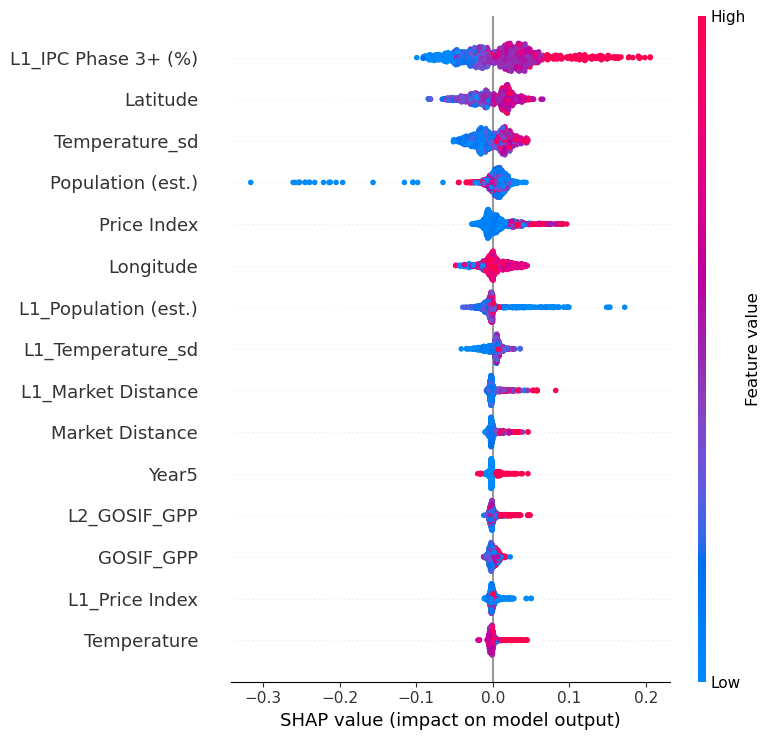

In [60]:
shap.summary_plot(shap_values_boost2, features=X2_test, feature_names=feature_names2, max_display=15)

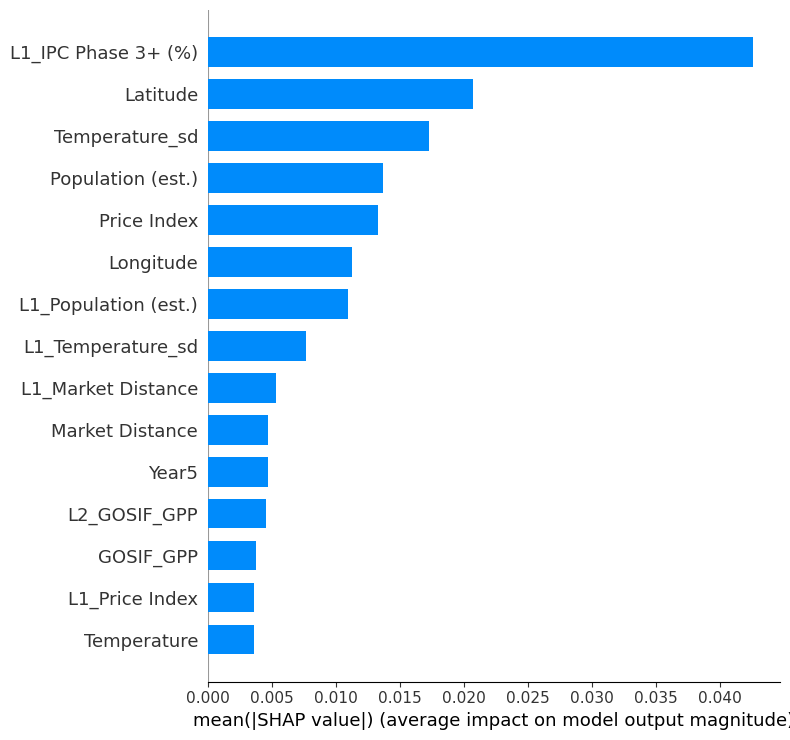

In [61]:

shap.summary_plot(shap_values_boost2, features=X2_test, feature_names=feature_names2, max_display=15, plot_type='bar')
